/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16190.072, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16187.458, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16188.418, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16188.377, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16185.810, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.712 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1053
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -8091.905
Date:                Wed, 19 Jun 2024   AIC                          16185.810
Time:                        15:24:46   BIC                          16190.768
Sample:                             0   HQIC                         16187.690
                               - 1053                                  

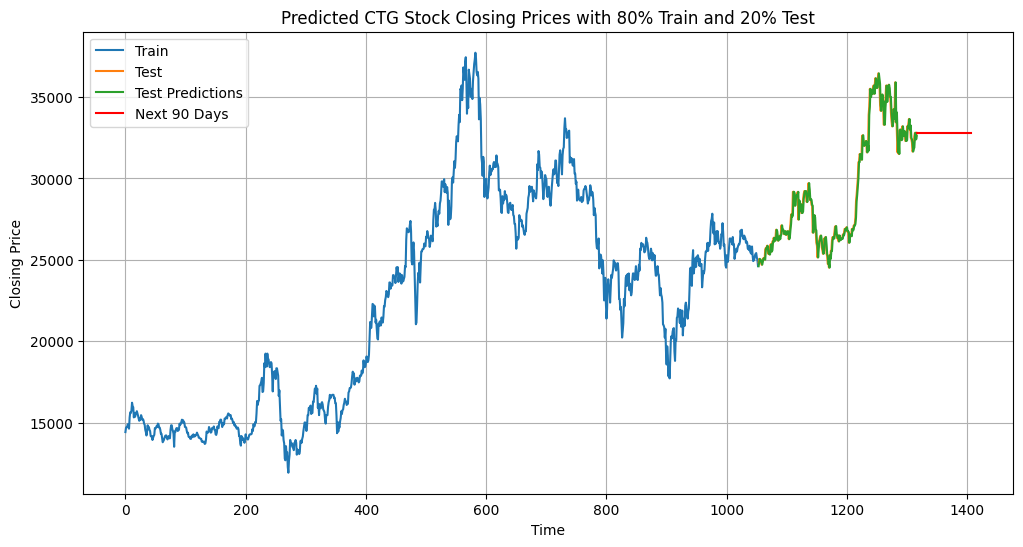

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14162.022, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14158.165, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14160.093, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14160.098, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14156.380, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.953 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  921
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -7077.190
Date:                Wed, 19 Jun 2024   AIC                          14156.380
Time:                        15:24:53   BIC                          14161.204
Sample:                             0   HQIC                         14158.221
                                - 921                                  

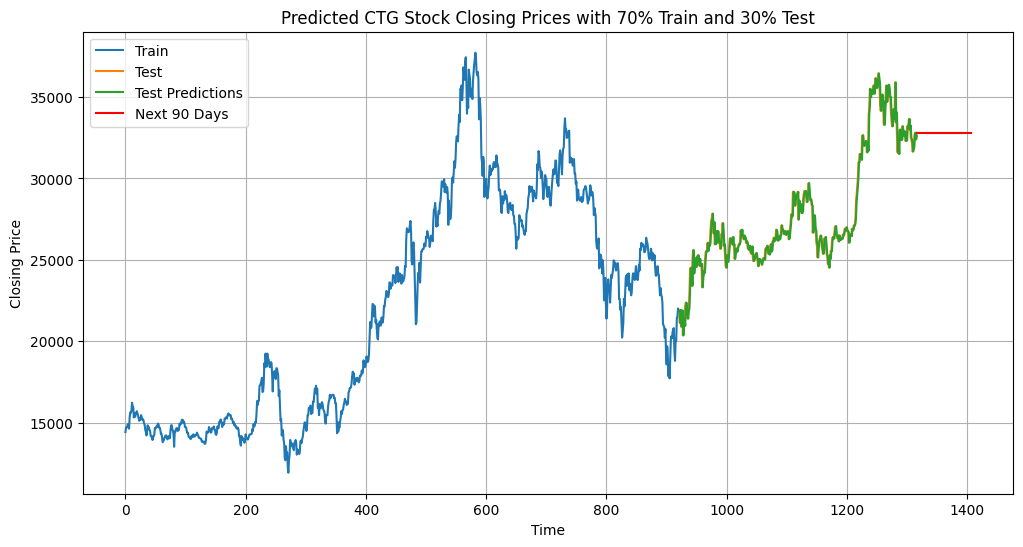

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18167.857, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18165.810, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18166.295, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18166.236, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18164.255, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.806 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1185
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -9081.127
Date:                Wed, 19 Jun 2024   AIC                          18164.255
Time:                        15:25:03   BIC                          18169.331
Sample:                             0   HQIC                         18166.168
                               - 1185                                  

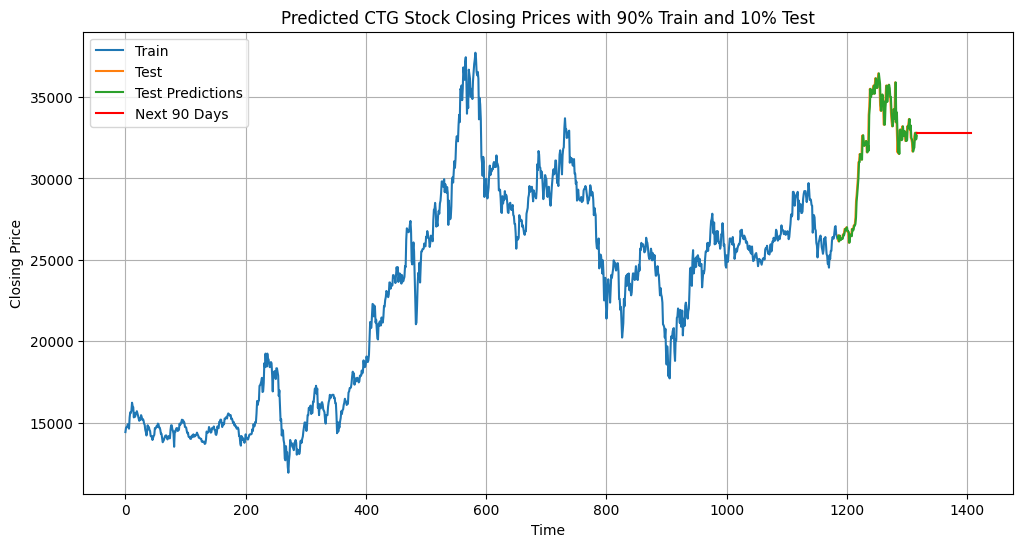

In [6]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error

from matplotlib import ticker
import matplotlib.pyplot as plt

!pip install pmdarima
from pmdarima.arima import auto_arima

# Train test 8:2

df = pd.read_csv('/content/CTG.VN-BaoCao.csv')

df.head()

df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(y_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=0, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

print(model.summary())

order = (model.order[0], model.order[1], model.order[2])
print(order)

from statsmodels.tsa.arima.model import ARIMA
def evaluate_ariama_model(x_data, y_data, order):
    y_pred = list()
    history = [x for x in y_train]
    for t in range(len(y_data)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        y_pred.append(yhat)
        obs = y_data[t]
        history.append(obs)
    mse = mean_squared_error(y_data, y_pred)
    mae = mean_absolute_error(y_data, y_pred)
    mape = mean_absolute_percentage_error(y_data, y_pred)
    rmse = mean_squared_error(y_data, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred, test_mse, test_mae, test_mape, test_rmse = evaluate_ariama_model(x_test, y_test, order)

print("Price predict on test data:", y_pred)
print("MSE on test data:", test_mse)
print("MAE on test data:", test_mae)
print("MAPE on test data:", test_mape)
print("RMSE on test data:", test_rmse)

last_index = len(df)-1


# Create arrays for 90 days
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict for the next 30 days
y_next_90_days = list()
history = [x for x in y_test]
for t in range(len(x_next_90_days)):
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    y_next_90_days.append(yhat)
    history.append(yhat)



plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, color='red', label='Next 90 Days')

# Adding titles and labels
plt.title('Predicted CTG Stock Closing Prices with 80% Train and 20% Test')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



# Train test 7:3

df = pd.read_csv('/content/CTG.VN-BaoCao.csv')

df.head()

df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size = int(0.7 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(y_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=0, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

print(model.summary())

order = (model.order[0], model.order[1], model.order[2])
print(order)

from statsmodels.tsa.arima.model import ARIMA
def evaluate_ariama_model(x_data, y_data, order):
    y_pred = list()
    history = [x for x in y_train]
    for t in range(len(y_data)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        y_pred.append(yhat)
        obs = y_data[t]
        history.append(obs)
    mse = mean_squared_error(y_data, y_pred)
    mae = mean_absolute_error(y_data, y_pred)
    mape = mean_absolute_percentage_error(y_data, y_pred)
    rmse = mean_squared_error(y_data, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred, test_mse, test_mae, test_mape, test_rmse = evaluate_ariama_model(x_test, y_test, order)

print("Price predict on test data:", y_pred)
print("MSE on test data:", test_mse)
print("MAE on test data:", test_mae)
print("MAPE on test data:", test_mape)
print("RMSE on test data:", test_rmse)

last_index = len(df)-1

# Create arrays for 90 days
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict for the next 30 days
y_next_90_days = list()
history = [x for x in y_test]
for t in range(len(x_next_90_days)):
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    y_next_90_days.append(yhat)
    history.append(yhat)



plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, color='red', label='Next 90 Days')

# Adding titles and labels
plt.title('Predicted CTG Stock Closing Prices with 70% Train and 30% Test')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



# Train test 9:1

df = pd.read_csv('/content/CTG.VN-BaoCao.csv')

df.head()

df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size = int(0.9 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(y_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=0, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

print(model.summary())

order = (model.order[0], model.order[1], model.order[2])
print(order)

from statsmodels.tsa.arima.model import ARIMA
def evaluate_ariama_model(x_data, y_data, order):
    y_pred = list()
    history = [x for x in y_train]
    for t in range(len(y_data)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        y_pred.append(yhat)
        obs = y_data[t]
        history.append(obs)
    mse = mean_squared_error(y_data, y_pred)
    mae = mean_absolute_error(y_data, y_pred)
    mape = mean_absolute_percentage_error(y_data, y_pred)
    rmse = mean_squared_error(y_data, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred, test_mse, test_mae, test_mape, test_rmse = evaluate_ariama_model(x_test, y_test, order)

print("Price predict on test data:", y_pred)
print("MSE on test data:", test_mse)
print("MAE on test data:", test_mae)
print("MAPE on test data:", test_mape)
print("RMSE on test data:", test_rmse)

last_index = len(df)-1


# Create arrays for 90 days
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict for the next 30 days
y_next_90_days = list()
history = [x for x in y_test]
for t in range(len(x_next_90_days)):
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    y_next_90_days.append(yhat)
    history.append(yhat)



plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, color='red', label='Next 90 Days')

# Adding titles and labels
plt.title('Predicted CTG Stock Closing Prices with 90% Train and 10% Test')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

